In [1]:
# %matplotlib inline
%time from hikyuu.interactive import *
from pylab import plot

2025-08-11 23:26:22,840 [INFO] runing in interactive session [<module>] (D:\workspace\hikyuu\hikyuu\__init__.py:109) [hikyuu::hku_info]
2025-08-11 23:26:22,840 [INFO] running in jupyter [<module>] (D:\workspace\hikyuu\hikyuu\__init__.py:116) [hikyuu::hku_info]


current plugin path: D:\workspace\hikyuu\hikyuu\plugin
2025-08-11 23:26:22.983 [HKU-I] - Using MYSQL BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-08-11 23:26:23.014 [HKU-I] - 加载市场信息…… (StockManager.cpp:572)
2025-08-11 23:26:23.027 [HKU-I] - 加载证券类型信息…… (StockManager.cpp:590)
2025-08-11 23:26:23.038 [HKU-I] - 加载证券信息…… (StockManager.cpp:476)
2025-08-11 23:26:23.210 [HKU-I] - 加载权息数据…… (StockManager.cpp:608)
2025-08-11 23:26:24.223 [HKU-I] - 加载板块信息…… (StockManager.cpp:181)
2025-08-11 23:26:25.314 [HKU-I] - 加载K线数据…… (StockManager.cpp:185)
2025-08-11 23:26:25.315 [HKU-I] - 预加载 day K线数据至缓存 (最大数量: 100000)! (StockManager.cpp:229)
2025-08-11 23:26:25.315 [HKU-I] - 2.32 秒数据加载完毕. (StockManager.cpp:191)
2025-08-11 23:26:25.316 [HKU-I] - 启动行情接收. (SpotAgent.cpp:39)
CPU times: total: 1.73 s
Wall time: 3.76 s


In [2]:
# 创建一个系统策略
# my_mm = MM_FixedCount(100)
my_mm = MM_Nothing()
my_sg = SG_Flex(EMA(CLOSE(), n=5), slow_n=10)
my_sys = SYS_Simple(sg=my_sg, mm=my_mm)

In [3]:
# 创建一个选择算法，用于在每日选定交易系统
# 此处是固定选择器，即每日选出的都是指定的交易系统
# my_se = SE_Fixed([s for s in blocka if s.valid], my_sys)
my_se = SE_Fixed([s for s in sm.get_block("指数板块", "沪深300")], my_sys)

In [4]:
# 创建一个资产分配器，用于确定如何在选定的交易系统中进行资产分配
# 此处创建的是一个等比例分配资产的分配器，即按相同比例在选出的系统中进行资金分配
my_af = AF_EqualWeight()

In [5]:
# 创建资产组合
# 创建一个从2001年1月1日开始的账户，初始资金200万元。这里由于使用的等比例分配器，意味着将账户剩余资金在所有选中的系统中平均分配，
# 如果初始资金过小，将导致每个系统都没有充足的资金完成交易。
my_tm = crtTM(Datetime(200101010000), 2000000)
my_pf = PF_Simple(tm=my_tm, af=my_af, se=my_se)

In [6]:
# 运行投资组合
q = Query(-500)
%time my_pf.run(Query(-500), 10)

CPU times: total: 5.36 s
Wall time: 9.89 s


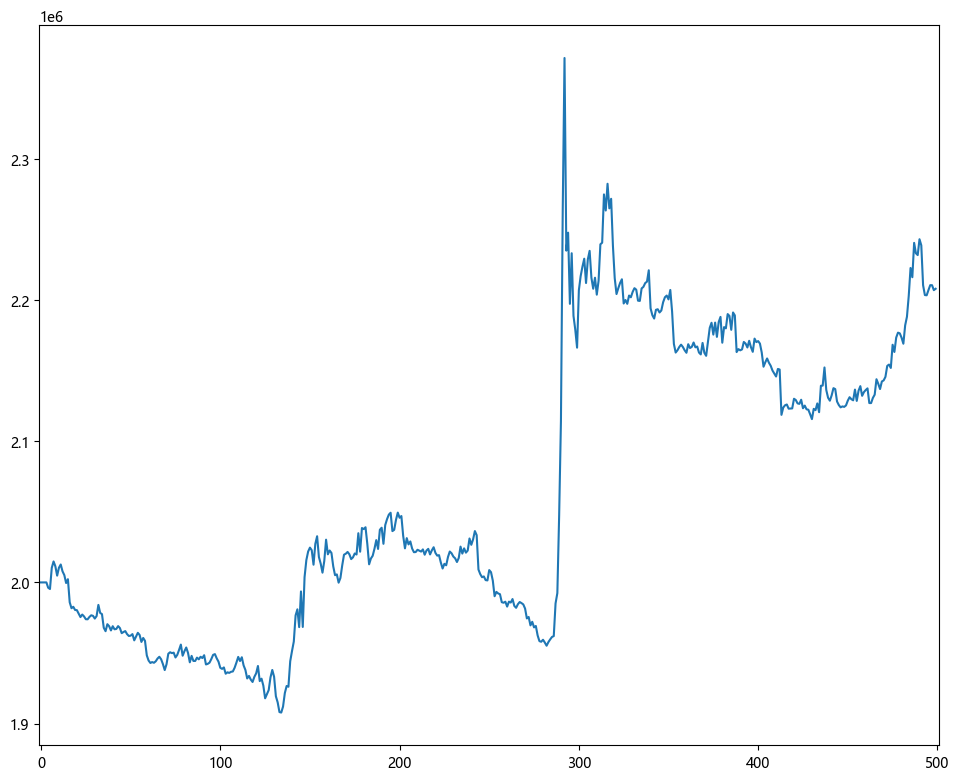

In [7]:
x = my_tm.get_funds_curve(sm.get_trading_calendar(q))
PRICELIST(x).plot()

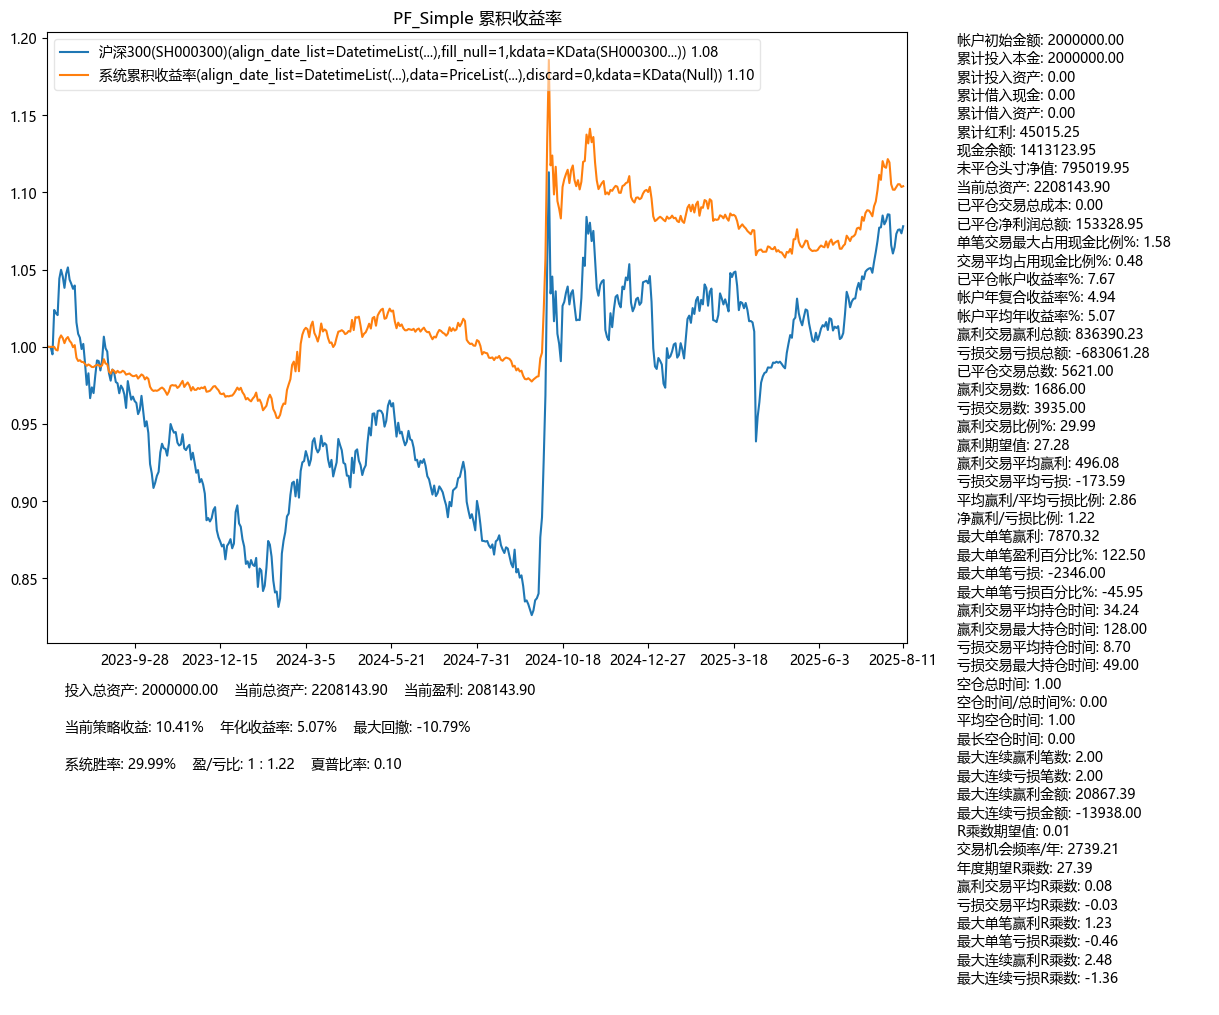

In [8]:
my_pf.performance()

In [9]:
my_tm

TradeManager {
  params: params[precision(int): 2, save_action(bool): 1, support_borrow_cash(bool): 0, support_borrow_stock(bool): 0, ],
  name: SYS,
  init_date: 2001-01-01 00:00:00,
  init_cash: 2000000.00,
  firstDatetime: 2023-07-25 00:00:00,
  lastDatetime: 2025-08-11 00:00:00,
  TradeCostFunc: TradeCostFunc(TC_Zero, params[]),
  current total funds: 2208143.90,
  current cash: 1413123.95,
  current market_value: 795019.95,
  current short_market_value: 0.00,
  current base_cash: 2000000.00,
  current base_asset: 0.00,
  current borrow_cash: 0.00,
  current borrow_asset: 0.00,
  Position: 
    SH600183 生益科技 2025-06-05 00:00:00 48 200.00 5432.00 8016.00 2584.00 47.57% 0.13%
    SH600188 兖矿能源 2025-08-06 00:00:00 4 500.00 6490.00 6655.00 165.00 2.54% 0.01%
    SH600219 南山铝业 2025-08-08 00:00:00 2 1800.00 7290.00 7398.00 108.00 1.48% 0.01%
    SH600233 圆通速递 2025-07-11 00:00:00 22 500.00 6985.00 8185.00 1200.00 17.18% 0.06%
    SH600276 恒瑞医药 2025-07-07 00:00:00 26 100.00 5338.00 6107.00

In [10]:
my_tm.get_position_list().to_df()

,证券代码,证券名称,买入时间,持仓天数,持仓数量,投入金额,当前市值,盈亏金额,盈亏百分比,止损价,目标价,清仓时间,累计持有数量,累计成本,累计风险,累计买入金额,累计卖出金额
0,SH600183,生益科技,2025-06-05,67,200.0,5432.0,8016.0,2584.0,47.57,0.0,NaN,NaT,200.0,0.0,5432.0,5432.0,0.0
1,SH600188,兖矿能源,2025-08-06,5,500.0,6490.0,6655.0,165.0,2.54,0.0,NaN,NaT,500.0,0.0,6490.0,6490.0,0.0
2,SH600219,南山铝业,2025-08-08,3,1800.0,7290.0,7398.0,108.0,1.48,0.0,NaN,NaT,1800.0,0.0,7290.0,7290.0,0.0
3,SH600233,圆通速递,2025-07-11,31,500.0,6985.0,8185.0,1200.0,17.18,0.0,NaN,NaT,500.0,0.0,6985.0,6985.0,0.0
4,SH600276,恒瑞医药,2025-07-07,35,100.0,5338.0,6107.0,769.0,14.41,0.0,NaN,NaT,100.0,0.0,5338.0,5338.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,SZ002938,鹏鼎控股,2025-06-06,66,200.0,5750.0,10326.0,4576.0,79.58,0.0,NaN,NaT,200.0,0.0,5950.0,5950.0,200.0
112,SZ300347,泰格医药,2025-07-01,41,100.0,5360.0,6689.0,1329.0,24.79,0.0,NaN,NaT,100.0,0.0,5360.0,5360.0,0.0
113,SZ300408,三环集团,2025-07-18,24,200.0,6618.0,6980.0,362.0,5.47,0.0,NaN,NaT,200.0,0.0,6618.0,6618.0,0.0
114,SZ300661,圣邦股份,2025-07-25,17,100.0,7148.0,7465.0,317.0,4.43,0.0,NaN,NaT,100.0,0.0,7148.0,7148.0,0.0


In [11]:
my_tm.get_trade_list().to_df()

,证券代码,证券名称,交易时间,业务名称,计划交易价格,实际成交价格,目标价格,交易数量,止损价,现金余额,交易总成本,佣金,印花税,过户费,其它成本,信号来源,备注
0,,,2001-01-01,INIT,2000000.00,2000000.00,0.0,0.0,0.0,2000000.00,0.0,0.0,0.0,0.0,0.0,--,
1,SH601288,农业银行,2023-07-25,BUY,3.44,3.44,NaN,1900.0,0.0,1993464.00,0.0,0.0,0.0,0.0,0.0,SG,
2,SH601818,光大银行,2023-07-25,BUY,2.97,2.97,NaN,2200.0,0.0,1986930.00,0.0,0.0,0.0,0.0,0.0,SG,
3,SZ000063,中兴通讯,2023-07-25,BUY,41.80,41.80,NaN,100.0,0.0,1982750.00,0.0,0.0,0.0,0.0,0.0,SG,
4,SH600027,华电国际,2023-07-25,BUY,6.03,6.03,NaN,1100.0,0.0,1976117.00,0.0,0.0,0.0,0.0,0.0,SG,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12592,SH601877,正泰电器,2025-08-11,BUY,23.29,23.29,NaN,300.0,0.0,1440217.45,0.0,0.0,0.0,0.0,0.0,SG,
12593,SH600803,新奥股份,2025-08-11,BUY,19.00,19.00,NaN,300.0,0.0,1434517.45,0.0,0.0,0.0,0.0,0.0,SG,
12594,SH601600,XD中国铝,2025-08-11,BUY,7.55,7.55,NaN,900.0,0.0,1427722.45,0.0,0.0,0.0,0.0,0.0,SG,
12595,SH601618,中国中冶,2025-08-11,BUY,3.15,3.15,NaN,2300.0,0.0,1420477.45,0.0,0.0,0.0,0.0,0.0,SG,
